In [193]:
# EJERCICIO 2 - PRIMERAS CONSULTAS

In [194]:
import psycopg2
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [195]:
conn = psycopg2.connect(host = "localhost", 
                        database = "northwind",
                        user = "postgres", 
                        password = "1234")

In [236]:
# Función general de ejecución de consultas

def ejecutar_query (query):
  cursor = conn.cursor() # Creamos una variable con la que iniciamos el cursor
  cursor.execute(query) # Ejecutamos la query
  rows = cursor.fetchall() # Creamos una variable con el restultado de la query en forma de lista de tuplas

  if (len(rows) >0):
    tabla = pd.DataFrame(rows)# Genereamos un DataFrame a partir de la variable anterior
    colnames = [desc[0] for desc in cursor.description] # Recuperamos los nombres de las columnas de la BBDD
    tabla = tabla.set_axis(colnames, axis = 1)# Renombramos las columnas del DF creado para que coincidan con las de la BBDD
    return tabla
  else:
    return "Sin resultados"

In [197]:
# 1. Qué empleados tenemos?

sql_query = ''' SELECT "employee_id", "first_name", "last_name", "city", "country"
FROM    "employees" '''

ejecutar_query(sql_query)

,employee_id,first_name,last_name,city,country
0,1,Nancy,Davolio,Seattle,USA
1,2,Andrew,Fuller,Tacoma,USA
2,3,Janet,Leverling,Kirkland,USA
3,4,Margaret,Peacock,Redmond,USA
4,5,Steven,Buchanan,London,UK
5,6,Michael,Suyama,London,UK
6,7,Robert,King,London,UK
7,8,Laura,Callahan,Seattle,USA
8,9,Anne,Dodsworth,London,UK


In [198]:
# 2. Qué productos tenemos?

sql_query = ''' SELECT "product_id", "supplier_id", "product_name", "unit_price", "units_in_stock", "units_on_order", "discontinued"
FROM    "products" '''

ejecutar_query(sql_query)

,product_id,supplier_id,product_name,unit_price,units_in_stock,units_on_order,discontinued
0,1,8,Chai,18.00,39,0,1
1,2,1,Chang,19.00,17,40,1
2,3,1,Aniseed Syrup,10.00,13,70,0
3,4,2,Chef Anton's Cajun Seasoning,22.00,53,0,0
4,5,2,Chef Anton's Gumbo Mix,21.35,0,0,1
...,...,...,...,...,...,...,...
72,73,17,Röd Kaviar,15.00,101,0,0
73,74,4,Longlife Tofu,10.00,4,20,0
74,75,12,Rhönbräu Klosterbier,7.75,125,0,0
75,76,23,Lakkalikööri,18.00,57,0,0


In [199]:
# 3. Tenemos productos discontinuados?

sql_query = ''' SELECT "product_name", "units_in_stock"
FROM    "products" 
WHERE "discontinued" = 1
'''

ejecutar_query(sql_query)


,product_name,units_in_stock
0,Chai,39
1,Chang,17
2,Chef Anton's Gumbo Mix,0
3,Mishi Kobe Niku,29
4,Alice Mutton,0
5,Guaraná Fantástica,20
6,Rössle Sauerkraut,26
7,Thüringer Rostbratwurst,0
8,Singaporean Hokkien Fried Mee,26
9,Perth Pasties,0


In [200]:
# 4. Qué proveedores tenemos?

sql_query = ''' SELECT "supplier_id", "company_name", "city", "country" 
FROM suppliers '''

ejecutar_query(sql_query)

,supplier_id,company_name,city,country
0,1,Exotic Liquids,London,UK
1,2,New Orleans Cajun Delights,New Orleans,USA
2,3,Grandma Kelly's Homestead,Ann Arbor,USA
3,4,Tokyo Traders,Tokyo,Japan
4,5,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain
5,6,Mayumi's,Osaka,Japan
6,7,"Pavlova, Ltd.",Melbourne,Australia
7,8,"Specialty Biscuits, Ltd.",Manchester,UK
8,9,PB Knäckebröd AB,Göteborg,Sweden
9,10,Refrescos Americanas LTDA,Sao Paulo,Brazil


In [201]:
# 5. Qué pedidos hemos tenido?

sql_query = ''' SELECT "order_id", "customer_id", "employee_id", "order_date", "required_date", "shipped_date"
FROM orders
 '''

ejecutar_query(sql_query)

,order_id,customer_id,employee_id,order_date,required_date,shipped_date
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11
...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,None
826,11074,SIMOB,7,1998-05-06,1998-06-03,None
827,11075,RICSU,8,1998-05-06,1998-06-03,None
828,11076,BONAP,4,1998-05-06,1998-06-03,None


In [202]:
# 6. Cuántos pedidos hemos tenido?

sql_query = ''' SELECT count("order_id") as num_pedidos
FROM orders
 '''

ejecutar_query(sql_query)

,num_pedidos
0,830


In [203]:
# 7. Cuántos clientes tenemos?

sql_query = ''' SELECT "customer_id", "company_name", "city", "country" 
FROM customers '''

ejecutar_query(sql_query)

,customer_id,company_name,city,country
0,ALFKI,Alfreds Futterkiste,Berlin,Germany
1,ANATR,Ana Trujillo Emparedados y helados,México D.F.,Mexico
2,ANTON,Antonio Moreno Taquería,México D.F.,Mexico
3,AROUT,Around the Horn,London,UK
4,BERGS,Berglunds snabbköp,Luleå,Sweden
...,...,...,...,...
86,WARTH,Wartian Herkku,Oulu,Finland
87,WELLI,Wellington Importadora,Resende,Brazil
88,WHITC,White Clover Markets,Seattle,USA
89,WILMK,Wilman Kala,Helsinki,Finland


In [204]:
# 8. Con qué empresas de transporte trabajamos?

sql_query = ''' SELECT "shipper_id", "company_name"
FROM shippers '''

ejecutar_query(sql_query)

,shipper_id,company_name
0,1,Speedy Express
1,2,United Package
2,3,Federal Shipping
3,4,Alliance Shippers
4,5,UPS
5,6,DHL


In [205]:
# 10. Cómo son las relaciones de reporte de resultados entre los empleados?

sql_query = ''' SELECT "employee_id", "first_name", "last_name", "title", "reports_to" 
FROM employees '''

df_employees_report_to = ejecutar_query(sql_query)
# df_employees_report_to

df_employees_report_to['reports_to'] = df_employees_report_to['reports_to'].apply(lambda x: int(x) if pd.notna(x) else np.nan)
df_employees_report_to['reports_to'] = df_employees_report_to['reports_to'].astype('Int64')

id_to_name = {row['employee_id']: f"{row['first_name']} {row['last_name']}" for _, row in df_employees_report_to.iterrows()}

df_employees_report_to['reports_to_name'] = df_employees_report_to['reports_to'].apply(lambda x: id_to_name.get(x, None))

df_employees_report_to

# se observa que toda la plantilla o reporta a Andrew que es el Vice Presidente de Ventas, o a Steven que es el Gerente de Ventas

,employee_id,first_name,last_name,title,reports_to,reports_to_name
0,1,Nancy,Davolio,Sales Representative,2,Andrew Fuller
1,2,Andrew,Fuller,"Vice President, Sales",<NA>,None
2,3,Janet,Leverling,Sales Representative,2,Andrew Fuller
3,4,Margaret,Peacock,Sales Representative,2,Andrew Fuller
4,5,Steven,Buchanan,Sales Manager,2,Andrew Fuller
5,6,Michael,Suyama,Sales Representative,5,Steven Buchanan
6,7,Robert,King,Sales Representative,5,Steven Buchanan
7,8,Laura,Callahan,Inside Sales Coordinator,2,Andrew Fuller
8,9,Anne,Dodsworth,Sales Representative,5,Steven Buchanan


## EJERCICIO 3 - ANÁLISIS DE LA EMPRESA

In [206]:
# Crear dataframe de las tablas de pedidos y clientes

sql_query = ''' SELECT "order_id", "customer_id", "employee_id", "order_date", "required_date", "shipped_date"
FROM orders
 '''
df_pedidos = ejecutar_query(sql_query)

sql_query = ''' SELECT "customer_id", "company_name", "city", "country" 
FROM customers '''

df_clientes =  ejecutar_query(sql_query)

df_pedidos_clientes = df_pedidos.merge(df_clientes,how = 'inner', on = 'customer_id')
df_pedidos_clientes.head()


,order_id,customer_id,employee_id,order_date,required_date,shipped_date,company_name,city,country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,Vins et alcools Chevalier,Reims,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,Toms Spezialitäten,Münster,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,Hanari Carnes,Rio de Janeiro,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,Victuailles en stock,Lyon,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,Suprêmes délices,Charleroi,Belgium


In [207]:
# 1. Estudia el numero de pedidos, por mes y año y haz una gráfico que refleje una línea temporal

# convert the date column into a datetime object
df_pedidos_clientes['order_date'] = pd.to_datetime(df_pedidos_clientes['order_date'])

# extract month, and year components
df_pedidos_clientes['order_date_month'] = df_pedidos_clientes['order_date'].dt.month
df_pedidos_clientes['order_date_year'] = df_pedidos_clientes['order_date'].dt.year

df_pedidos_clientes

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,company_name,city,country,order_date_month,order_date_year
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,Vins et alcools Chevalier,Reims,France,7,1996
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,Toms Spezialitäten,Münster,Germany,7,1996
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,Hanari Carnes,Rio de Janeiro,Brazil,7,1996
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,Victuailles en stock,Lyon,France,7,1996
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,Suprêmes délices,Charleroi,Belgium,7,1996
...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,None,Pericles Comidas clásicas,México D.F.,Mexico,5,1998
826,11074,SIMOB,7,1998-05-06,1998-06-03,None,Simons bistro,Kobenhavn,Denmark,5,1998
827,11075,RICSU,8,1998-05-06,1998-06-03,None,Richter Supermarkt,Genève,Switzerland,5,1998
828,11076,BONAP,4,1998-05-06,1998-06-03,None,Bon app',Marseille,France,5,1998


In [208]:

total_orders_by_order_date = df_pedidos_clientes.groupby(['order_date_year', 'order_date_month'])['order_id'].sum().reset_index()

nueva_columna = {"order_id":  "total_orders"}
total_orders_by_order_date.rename( columns = nueva_columna, inplace = True)

# se crea la nueva columna año-mes para poder después generar la gráfica de lineas ordenada por ese campo de tiempo
total_orders_by_order_date['Año-Mes'] = total_orders_by_order_date.apply(lambda row: f"{row['order_date_year']}-{row['order_date_month']}", axis=1)
total_orders_by_order_date.head()


,order_date_year,order_date_month,total_orders,Año-Mes
0,1996,7,225687,1996-7
1,1996,8,257050,1996-8
2,1996,9,237038,1996-9
3,1996,10,268593,1996-10
4,1996,11,258900,1996-11


In [209]:
# gráfica de líneas que muestra la evolución de los pedidos agrupados por mes
fig = px.line(total_orders_by_order_date, 
							x = 'Año-Mes', 
							y = 'total_orders', 
							text = 'total_orders')
fig.update_traces(textposition = "top center")
fig.update_layout(title = dict(text = "Pedidos realizados a lo largo del tiempo"))
fig.show()

In [210]:
# 2. Estudio de países - continentes y ventas
df_pedidos_por_pais = df_pedidos_clientes.groupby('country')['order_id'].sum().reset_index()

continentes = {
                'Europe': ['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Italy', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'UK'],
                'America': ['Argentina', 'Brazil', 'Canada', 'Mexico', 'USA', 'Venezuela'] 
              }

pais_a_continente = {}
for continente, paises in continentes.items():
    for pais in paises:
        pais_a_continente[pais] = continente

df_pedidos_por_pais['continente'] = df_pedidos_por_pais['country'].map(pais_a_continente)

df_pedidos_por_pais.head()


,country,order_id,continente
0,Argentina,172703,America
1,Austria,425983,Europe
2,Belgium,204000,Europe
3,Brazil,885970,America
4,Canada,319394,America


In [211]:
# Agrupamos por continente
df_pedidos_por_continente = df_pedidos_por_pais.groupby('continente')['order_id'].sum().reset_index()
df_pedidos_por_continente

,continente,order_id
0,America,3467451
1,Europe,5382424


In [212]:
# Ahora crearemos nuestro pieplot ya que solo tenemos dos variables: america y europe
fig = px.pie(df_pedidos_por_continente, values = 'order_id', names = 'continente')

fig.update_layout(title=dict(text = "Distribución de ventas por continente"),
                  legend=dict( yanchor = "top", y = 0.99, xanchor = "right", x = 0.75))

fig.show()

In [213]:
# 3. Pedidos con retraso, o sin registro de llegada. Determinar si la compañía tiene relación o no mediante boxplot

df_pedidos_clientes_retrasos = df_pedidos_clientes[['order_id', 'company_name', 'shipped_date', 'required_date']]

df_pedidos_clientes_retrasos

,order_id,company_name,shipped_date,required_date
0,10248,Vins et alcools Chevalier,1996-07-16,1996-08-01
1,10249,Toms Spezialitäten,1996-07-10,1996-08-16
2,10250,Hanari Carnes,1996-07-12,1996-08-05
3,10251,Victuailles en stock,1996-07-15,1996-08-05
4,10252,Suprêmes délices,1996-07-11,1996-08-06
...,...,...,...,...
825,11073,Pericles Comidas clásicas,None,1998-06-02
826,11074,Simons bistro,None,1998-06-03
827,11075,Richter Supermarkt,None,1998-06-03
828,11076,Bon app',None,1998-06-03


In [214]:
# manipulación de las columnas 'shipped_date' y 'required_date' a tipo fecha para poder ver los días que pasan

# Paso 1: Convertir las columnas a datetime
df_pedidos_clientes_retrasos['shipped_date'] = pd.to_datetime(df_pedidos_clientes_retrasos['shipped_date'])
df_pedidos_clientes_retrasos['required_date'] = pd.to_datetime(df_pedidos_clientes_retrasos['required_date'])

# Paso 2: Restar las fechas y crear una nueva columna con la diferencia
df_pedidos_clientes_retrasos['diferencia_dias'] = (df_pedidos_clientes_retrasos['required_date'] - df_pedidos_clientes_retrasos['shipped_date']).dt.days

# pasamos a int y ponemos a 0 los nulos
df_pedidos_clientes_retrasos['diferencia_dias'] = df_pedidos_clientes_retrasos['diferencia_dias'].fillna(0).astype(int)

df_pedidos_clientes_retrasos


,order_id,company_name,shipped_date,required_date,diferencia_dias
0,10248,Vins et alcools Chevalier,1996-07-16,1996-08-01,16
1,10249,Toms Spezialitäten,1996-07-10,1996-08-16,37
2,10250,Hanari Carnes,1996-07-12,1996-08-05,24
3,10251,Victuailles en stock,1996-07-15,1996-08-05,21
4,10252,Suprêmes délices,1996-07-11,1996-08-06,26
...,...,...,...,...,...
825,11073,Pericles Comidas clásicas,NaT,1998-06-02,0
826,11074,Simons bistro,NaT,1998-06-03,0
827,11075,Richter Supermarkt,NaT,1998-06-03,0
828,11076,Bon app',NaT,1998-06-03,0


In [215]:
df_pedidos_clientes_no_llegan = df_pedidos_clientes_retrasos[df_pedidos_clientes_retrasos['diferencia_dias'] == 0]

df_pedidos_clientes_no_llegan.head()

,order_id,company_name,shipped_date,required_date,diferencia_dias
540,10788,QUICK-Stop,1998-01-19,1998-01-19,0
730,10978,Maison Dewey,1998-04-23,1998-04-23,0
750,10998,Wolski Zajazd,1998-04-17,1998-04-17,0
760,11008,Ernst Handel,NaT,1998-05-06,0
771,11019,Rancho grande,NaT,1998-05-11,0


In [216]:
df_pedidos_clientes_retrasos_por_compañia = df_pedidos_clientes_retrasos.groupby('company_name')[['diferencia_dias']].count().reset_index()
df_pedidos_clientes_retrasos_por_compañia

,company_name,diferencia_dias
0,Alfreds Futterkiste,6
1,Ana Trujillo Emparedados y helados,4
2,Antonio Moreno Taquería,7
3,Around the Horn,13
4,B's Beverages,10
...,...,...
84,Wartian Herkku,15
85,Wellington Importadora,9
86,White Clover Markets,14
87,Wilman Kala,7


In [217]:
fig = px.box(df_pedidos_clientes_retrasos_por_compañia, x = 'diferencia_dias',labels = {'Diferencia de dias':'Diferencia de dias'})
fig.update_layout(title = dict(text = "Días en tránsito de los pedidos (required date - shipped date)", font = dict(size = 20), automargin = True, yref = 'paper', x = 0.2,y = 1))

fig.show()

# se determina una mediana en 8 días, y los rangos son para el primer de 5, y para el tercero de 12. Hay 3 outliers en 28, 30 y 31 días.

In [218]:
# determinar las 5 empresas que más retrasos acumulan 
df_pedidos_clientes_retrasos_por_compañia = df_pedidos_clientes_retrasos.groupby('company_name')[['diferencia_dias']].sum().reset_index()

df_pedidos_clientes_retrasos_por_compañia.sort_values("diferencia_dias", axis=0, ascending=False, inplace=True, na_position='first')

df_pedidos_clientes_retrasos_por_compañia.head()

,company_name,diferencia_dias
69,Save-a-lot Markets,622
20,Ernst Handel,583
59,QUICK-Stop,462
23,Folk och fä HB,363
63,Rattlesnake Canyon Grocery,353


In [219]:
# comprobación del detalle de pedidos de la empresa con más retraso (Save a lot of Markets)
df_save_a_lot_markets = df_pedidos_clientes_retrasos[df_pedidos_clientes_retrasos['company_name'] == 'Save-a-lot Markets']
df_save_a_lot_markets.head()

,order_id,company_name,shipped_date,required_date,diferencia_dias
76,10324,Save-a-lot Markets,1996-10-10,1996-11-05,26
145,10393,Save-a-lot Markets,1997-01-03,1997-01-22,19
150,10398,Save-a-lot Markets,1997-01-09,1997-01-27,18
192,10440,Save-a-lot Markets,1997-02-28,1997-03-10,10
204,10452,Save-a-lot Markets,1997-02-26,1997-03-20,22


In [220]:
# 4. Distribución media del precio del pedido por país de procedencia del cliente.
sql_query = ''' SELECT "order_id", ROUND(CAST(SUM("unit_price" * "quantity") AS NUMERIC), 2) AS precio_total
FROM order_details
GROUP BY "order_id"
ORDER BY precio_total DESC
 '''
df_detalle_pedidos = ejecutar_query(sql_query)
df_detalle_pedidos

,order_id,precio_total
0,10865,17250.00
1,11030,16321.90
2,10981,15810.00
3,10372,12281.20
4,10424,11493.20
...,...,...
825,10898,30.00
826,10586,28.00
827,10767,28.00
828,10807,18.40


In [221]:
# combinamos el DF principal de pedidos-clientes con el nuevo de detalle-pedidos, y nos quedamos solo con las 3 columnas que nos interesan
df_detalle_pedidos_cliente = df_detalle_pedidos.merge(df_pedidos_clientes, on="order_id")

df_detalle_pedidos_cliente_pais = df_detalle_pedidos_cliente[['order_id', 'precio_total', 'country']]
df_detalle_pedidos_cliente_pais

,order_id,precio_total,country
0,10865,17250.00,Germany
1,11030,16321.90,USA
2,10981,15810.00,Brazil
3,10372,12281.20,Brazil
4,10424,11493.20,Canada
...,...,...,...
825,10898,30.00,Argentina
826,10586,28.00,Italy
827,10767,28.00,Belgium
828,10807,18.40,Italy


In [222]:
# agrupos para ver el precio medio por país
df_detalle_pedidos_cliente_pais = df_detalle_pedidos_cliente_pais.groupby('country')[['precio_total']].mean().reset_index()

# redondeamos a solo dos decimales
df_detalle_pedidos_cliente_pais['precio_total'] = df_detalle_pedidos_cliente_pais['precio_total'].apply(lambda x: f"{x:.2f}")

# reconvertimos precio total a tipo float
df_detalle_pedidos_cliente_pais['precio_total'] = df_detalle_pedidos_cliente_pais['precio_total'].astype(float)

# ordenamos descendentemente el precio medio por país
df_detalle_pedidos_cliente_pais.sort_values("precio_total", axis=0, ascending=False, inplace=True, na_position='first')

df_detalle_pedidos_cliente_pais.head()

,country,precio_total
1,Austria,3487.42
9,Ireland,3016.70
19,USA,2160.39
8,Germany,2005.25
5,Denmark,1932.35


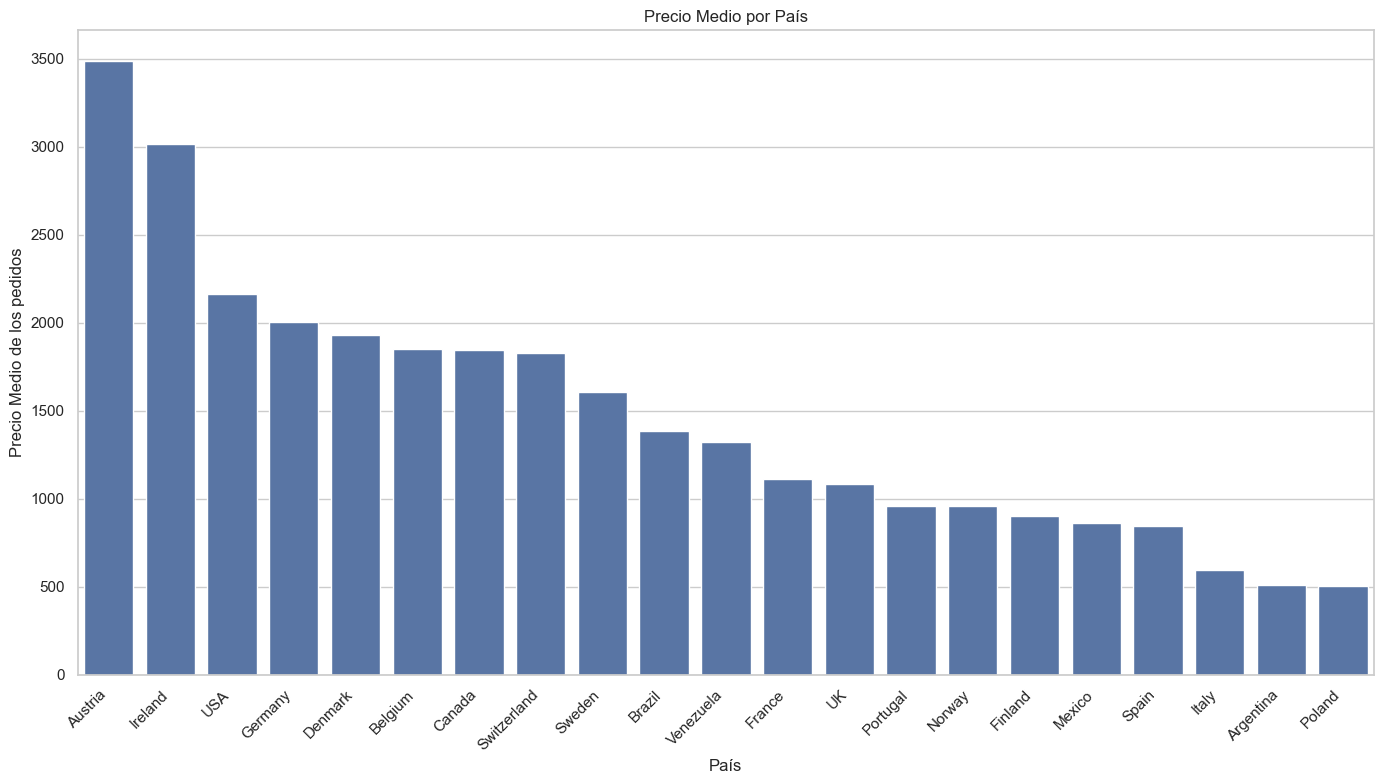

In [223]:
# Gráfica de barras para mostrar la distribución media del precio del pedido por país de procedencia del cliente.

# Configuración del estilo de seaborn
sns.set_theme(style="whitegrid")

# Crear la gráfica de barras
plt.figure(figsize=(14, 8))  # Ajustar el tamaño de la figura
ax = sns.barplot(x="country", y="precio_total", data=df_detalle_pedidos_cliente_pais, dodge=False)

# Añadir etiquetas a cada barra
# for index, row in df_detalle_pedidos_cliente_pais.iterrows():
#     ax.text(index, row['precio_total'], f"{row['precio_total']:.2f}", ha='center', va='bottom')

# Personalizar la gráfica
plt.title("Precio Medio por País")
plt.xlabel("País")
plt.ylabel("Precio Medio de los pedidos")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x

# Ajustar el layout para evitar el recorte de etiquetas
plt.tight_layout()
plt.show()


In [224]:
# 5. hay clientes que no hayan comprado nunca? que porcentaje de clientes no tienen pedidos registrados?

sql_query = ''' SELECT c.customer_id, c.company_name, c.country, o.order_id
FROM customers AS c
LEFT JOIN orders AS o 
ON c.customer_id = o.customer_id
 '''
df_join_pedido_cliente = ejecutar_query(sql_query)
df_join_pedido_cliente.head()
df_join_pedido_cliente

,customer_id,company_name,country,order_id
0,VINET,Vins et alcools Chevalier,France,10248.0
1,TOMSP,Toms Spezialitäten,Germany,10249.0
2,HANAR,Hanari Carnes,Brazil,10250.0
3,VICTE,Victuailles en stock,France,10251.0
4,SUPRD,Suprêmes délices,Belgium,10252.0
...,...,...,...,...
827,RICSU,Richter Supermarkt,Switzerland,11075.0
828,BONAP,Bon app',France,11076.0
829,RATTC,Rattlesnake Canyon Grocery,USA,11077.0
830,PARIS,Paris spécialités,France,NaN


In [225]:
# miramos el numero de nulos
df_clientes_sin_comprar = df_join_pedido_cliente[df_join_pedido_cliente['order_id'].isnull()]
df_clientes_sin_comprar

# tenemos dos clientes que nunca han comprado: PARIS, y FISSA

,customer_id,company_name,country,order_id
830,PARIS,Paris spécialités,France,NaN
831,FISSA,FISSA Fabrica Inter. Salchichas S.A.,Spain,NaN


In [226]:
# porcentaje de clientes que no han comprado
clientes_unicos = len(df_join_pedido_cliente['customer_id'].unique())
clientes_sin_comprar = len(df_join_pedido_cliente[df_join_pedido_cliente['order_id'].isnull()])

print(f"El porcentaje de clientes que no nos han comprado es de {(clientes_sin_comprar / clientes_unicos * 100):.2f}")


El porcentaje de clientes que no nos han comprado es de 2.20


In [227]:
# 6. Estudia los productos más demandados e investiga cuál es necesario hacer reestock (20 unidades o menos sin previsión de llegada)
sql_query = ''' SELECT 
                    p.product_id, p.product_name,
                    ROUND(SUM(o.unit_price * o.quantity)) AS total_ventas,
	                ROUND(SUM(o.quantity)) AS total_unidades_vendidas,
	                p.units_in_stock, p.units_on_order
                FROM 
                    order_details AS o
                LEFT JOIN 
                    products AS p
                ON 
                    o.product_id = p.product_id
                GROUP BY 
                    p.product_name, p.product_id, p.units_in_stock, p.units_on_order
                ORDER BY 
                    total_ventas DESC
            '''
df_productos_mas_demandados = ejecutar_query(sql_query)
df_productos_mas_demandados

top10_productos_mas_demandados = df_productos_mas_demandados.head(10)
top10_productos_mas_demandados

,product_id,product_name,total_ventas,total_unidades_vendidas,units_in_stock,units_on_order
0,38,Côte de Blaye,149984.0,623.0,17,0
1,29,Thüringer Rostbratwurst,87736.0,746.0,0,0
2,59,Raclette Courdavault,76296.0,1496.0,79,0
3,60,Camembert Pierrot,50286.0,1577.0,19,0
4,62,Tarte au sucre,49828.0,1083.0,17,0
5,56,Gnocchi di nonna Alice,45121.0,1263.0,21,10
6,51,Manjimup Dried Apples,44743.0,886.0,20,0
7,17,Alice Mutton,35482.0,978.0,0,0
8,18,Carnarvon Tigers,31988.0,539.0,42,0
9,28,Rössle Sauerkraut,26866.0,640.0,26,0


In [228]:
df_productos_bajo_stock = df_productos_mas_demandados[ (df_productos_mas_demandados['units_in_stock'] <= 20) & (df_productos_mas_demandados['units_on_order'] == 0)]
df_productos_bajo_stock

# Es urgente pedir de las que tienen 0 stock y además gran volumen de ventas como los product_id: 29 y 17

,product_id,product_name,total_ventas,total_unidades_vendidas,units_in_stock,units_on_order
0,38,Côte de Blaye,149984.0,623.0,17,0
1,29,Thüringer Rostbratwurst,87736.0,746.0,0,0
3,60,Camembert Pierrot,50286.0,1577.0,19,0
4,62,Tarte au sucre,49828.0,1083.0,17,0
6,51,Manjimup Dried Apples,44743.0,886.0,20,0
7,17,Alice Mutton,35482.0,978.0,0,0
10,72,Mozzarella di Giovanni,25739.0,806.0,14,0
15,7,Uncle Bob's Organic Dried Pears,22464.0,763.0,15,0
17,26,Gumbär Gummibärchen,21535.0,753.0,15,0
18,53,Perth Pasties,21510.0,722.0,0,0


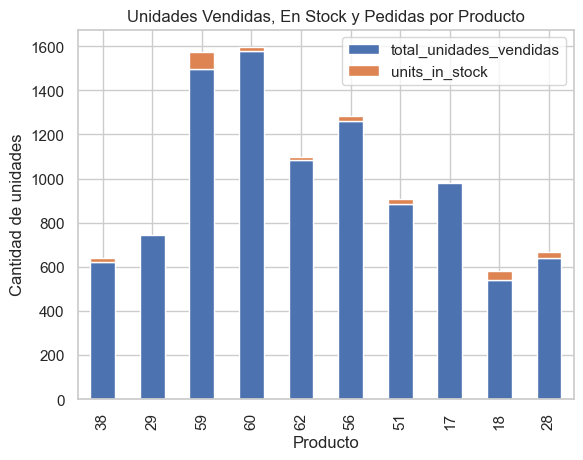

In [229]:
# Gráfico de barras apiladas que representa la relación entre el volumen de ventas y el stock
top10_productos_mas_demandados.set_index('product_id')[['total_unidades_vendidas', 'units_in_stock']].plot(kind='bar', stacked=True)
plt.title('Unidades Vendidas, En Stock y Pedidas por Producto')
plt.xlabel('Producto')
plt.ylabel('Cantidad de unidades')
plt.show()

# el gráfico nos confirma que tanto el producto 29 como 17, han vendido mucho y no tienen stock

In [230]:
# EJERCICIO 4 QUERIES AVANZADAS

In [238]:
# 1. Cuándo fue la última vez que se pidió un producto de cada categoría?

sql_query = ''' SELECT 
                    c.category_name,
	                MAX(o.order_date) as ultima_fecha_pedido
                FROM 
                    orders AS o
                JOIN 
                    order_details AS od ON o.order_id = od.order_id
                JOIN 
                    products AS p ON od.product_id = p.product_id
                JOIN 
                    categories AS c ON p.category_id = c.category_id
                GROUP BY
                    c.category_name
                ORDER BY 
                    c.category_name;
            '''
df_fecha_ultimo_pedido_por_categoria = ejecutar_query(sql_query)
df_fecha_ultimo_pedido_por_categoria

,category_name,ultima_fecha_pedido
0,Beverages,1998-05-06
1,Condiments,1998-05-06
2,Confections,1998-05-06
3,Dairy Products,1998-05-06
4,Grains/Cereals,1998-05-06
5,Meat/Poultry,1998-05-06
6,Produce,1998-05-06
7,Seafood,1998-05-06


In [237]:
# 2. Hay algun producto que no se haya vendido nunca por su precio original? == producto que siempre se haya vendido con algún descuento? (discount >0)

sql_query = ''' SELECT p.product_id, p.product_name
                FROM products AS p
                LEFT JOIN order_details AS od
                ON p.product_id = od.product_id
                GROUP BY p.product_id, p.product_name
                HAVING MIN(od.discount) > 0
            '''


df_producto_siempre_con_descuento = ejecutar_query(sql_query)
df_producto_siempre_con_descuento

# Todos los productos, al menos en alguna ocasión se han vendido a su precio original

'Sin resultados'

In [239]:
# comprobación a la inversa. Ver todos los productos que alguna vez se han comprado con descuento

sql_query = ''' SELECT DISTINCT p.product_id, p.product_name
                FROM products AS p
                JOIN order_details AS od
                ON p.product_id = od.product_id
                WHERE od.discount > 0;
            '''

df_producto_alguna_vez_con_descuento = ejecutar_query(sql_query)
df_producto_alguna_vez_con_descuento

,product_id,product_name
0,17,Alice Mutton
1,53,Perth Pasties
2,60,Camembert Pierrot
3,55,Pâté chinois
4,35,Steeleye Stout
...,...,...
72,18,Carnarvon Tigers
73,6,Grandma's Boysenberry Spread
74,56,Gnocchi di nonna Alice
75,73,Röd Kaviar


In [240]:
# 3. Ver el detalle de los productos con categoría "Confections"

sql_query = ''' SELECT p.product_id, p.product_name, c.category_id
                FROM products AS p
                JOIN categories AS c
                ON p.category_id = c.category_id
                WHERE c.category_name = 'Confections'
            '''

df_productos_cat_confections = ejecutar_query(sql_query)
df_productos_cat_confections

,product_id,product_name,category_id
0,16,Pavlova,3
1,19,Teatime Chocolate Biscuits,3
2,20,Sir Rodney's Marmalade,3
3,21,Sir Rodney's Scones,3
4,25,NuNuCa Nuß-Nougat-Creme,3
5,26,Gumbär Gummibärchen,3
6,27,Schoggi Schokolade,3
7,47,Zaanse koeken,3
8,48,Chocolade,3
9,49,Maxilaku,3


In [241]:
# 4 Revisar si existe algún proveedor, el cual tenga todos sus productos discontinuados

sql_query = ''' SELECT s.supplier_id, s.company_name
                FROM suppliers AS s
                JOIN products AS p ON s.supplier_id = p.supplier_id
                GROUP BY s.supplier_id, s.company_name
                HAVING COUNT(CASE WHEN p.discontinued = 0 THEN 1 END) = 0;
            '''

df_proveedor_todos_sus_productos_descontinuados = ejecutar_query(sql_query)
df_proveedor_todos_sus_productos_descontinuados

# tenemos al proveedor 10, 'refrescos americanas' que tiene todos sus productos discontinuados, por lo tanto podríamos prescindir de él

,supplier_id,company_name
0,10,Refrescos Americanas LTDA


In [249]:
# para acabar de revisar si es correcto vamos a realizar otra consulta más amplia donde se muestra el numero total de productos, y los discontinuados agrupados por proveedor

sql_query = ''' SELECT 
                p.supplier_id, s.company_name,
                count(p.product_id) as num_productos, 
                SUM(CASE WHEN p.discontinued = 1 THEN 1 ELSE 0 END) AS num_productos_discontinuados
                FROM products AS p
                JOIN suppliers AS s
                ON p.supplier_id = s.supplier_id
                GROUP BY p.supplier_id, s.company_name
            '''

df_productos_proveedores = ejecutar_query(sql_query)
df_productos_proveedores['Todos discontinuados'] = (df_productos_proveedores['num_productos']-df_productos_proveedores['num_productos_discontinuados']) == 0
df_productos_proveedores

,supplier_id,company_name,num_productos,num_productos_discontinuados,Todos discontinuados
0,28,Gai pâturage,2,0,False
1,4,Tokyo Traders,3,1,False
2,13,Nord-Ost-Fisch Handelsgesellschaft mbH,1,0,False
3,7,"Pavlova, Ltd.",5,1,False
4,15,Norske Meierier,3,0,False
5,23,Karkki Oy,3,0,False
6,9,PB Knäckebröd AB,2,0,False
7,14,Formaggi Fortini s.r.l.,3,0,False
8,21,Lyngbysild,2,0,False
9,1,Exotic Liquids,2,1,False


In [250]:
df_productos_proveedores_todos_discontinuados = df_productos_proveedores[df_productos_proveedores['Todos discontinuados'] == True] 
df_productos_proveedores_todos_discontinuados

,supplier_id,company_name,num_productos,num_productos_discontinuados,Todos discontinuados
20,10,Refrescos Americanas LTDA,1,1,True


In [252]:
# 5. Extraer los clientes que compraron mas de 30 articulos "Chai" en un único pedido

sql_query = ''' SELECT c.company_name, o.order_id, od.quantity, p.product_name
                FROM orders AS o
                JOIN customers as c
                ON c.customer_id = o.customer_id
                JOIN order_details AS od
                ON o.order_id = od.order_id
                JOIN products AS p
                ON od.product_id = p.product_id
                WHERE p.product_name = 'Chai' AND od.quantity > 30
            '''

df_clientes_chai_masde30u = ejecutar_query(sql_query)
df_clientes_chai_masde30u

# 9 clientes han realizado pedidos de más de 30 unidades de Chai

,company_name,order_id,quantity,product_name
0,QUICK-Stop,10285,45,Chai
1,Lehmanns Marktstand,10522,40,Chai
2,Berglunds snabbköp,10689,35,Chai
3,LINO-Delicateses,10729,50,Chai
4,Save-a-lot Markets,10847,80,Chai
5,Seven Seas Imports,10869,40,Chai
6,Bottom-Dollar Markets,10918,60,Chai
7,Save-a-lot Markets,11031,45,Chai
8,Lehmanns Marktstand,11070,40,Chai


In [253]:
# 6. Indica los clientes cuya suma total de carga en los pedidos sea mayor de 1000

sql_query = ''' SELECT  c.company_name, 
                ROUND(SUM(od.quantity * od.unit_price * (1 - od.discount))) as total_price
                FROM orders AS o
                JOIN customers as c
                ON c.customer_id = o.customer_id
                JOIN order_details AS od
                ON o.order_id = od.order_id
                GROUP BY c.company_name
                HAVING SUM(od.quantity * od.unit_price * (1 - od.discount)) > 1000
                ORDER BY total_price DESC
            '''

df_clientes_sumapedidos_masde1000 = ejecutar_query(sql_query)
df_clientes_sumapedidos_masde1000

# practicamente todos los clientes acumulan unas compras > 1000. Unicamente 5 clientes no la cumplen

,company_name,total_price
0,QUICK-Stop,110277.0
1,Ernst Handel,104875.0
2,Save-a-lot Markets,104362.0
3,Rattlesnake Canyon Grocery,51098.0
4,Hungry Owl All-Night Grocers,49980.0
...,...,...
79,Franchi S.p.A.,1546.0
80,GROSELLA-Restaurante,1489.0
81,Vins et alcools Chevalier,1480.0
82,Romero y tomillo,1467.0


In [254]:
sql_query = ''' SELECT  c.company_name, 
                ROUND(SUM(od.quantity * od.unit_price * (1 - od.discount))) as total_price
                FROM orders AS o
                JOIN customers as c
                ON c.customer_id = o.customer_id
                JOIN order_details AS od
                ON o.order_id = od.order_id
                GROUP BY c.company_name
                HAVING SUM(od.quantity * od.unit_price * (1 - od.discount)) <= 1000
                ORDER BY total_price DESC
            '''

df_clientes_no_sumapedidos_masde1000 = ejecutar_query(sql_query)
df_clientes_no_sumapedidos_masde1000

,company_name,total_price
0,Galería del gastrónomo,837.0
1,North/South,649.0
2,Laughing Bacchus Wine Cellars,522.0
3,Lazy K Kountry Store,357.0
4,Centro comercial Moctezuma,101.0


In [255]:
# 7. Nombres de las ciudades con 3 o más empleadas de cara a estudiar la apertura de nuevas oficinas

sql_query = ''' SELECT city, count(employee_id) AS total_employees
                FROM employees
                GROUP BY city
                HAVING count(employee_id) > 3
            '''

df_ciudades_masde3_empleados = ejecutar_query(sql_query)
df_ciudades_masde3_empleados

# Se determina que únicamente para la ciudad de Londres sería necesario abrir nueva oficinas

,city,total_employees
0,London,4
